# Bangalore House Price Prediction - Supervised Regression Problem

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"Bangalore house data.csv"
df= pd.read_csv(path)
df.shape

(13320, 8)


# Exploratory Data Analysis

In [3]:
# get the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   society     7818 non-null   object 
 4   total_sqft  13320 non-null  object 
 5   bath        13247 non-null  float64
 6   balcony     12711 non-null  float64
 7   price       13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [4]:
# We have only 3 neumerical features - bath, balcony and price
# 4 categorical features - area type, size, society, and total_srft
# Target Feature =======>>>>>> price >>>>>>
# Price in lakh

In [5]:
df.describe()
#observe 75% and max value it shows huge diff

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


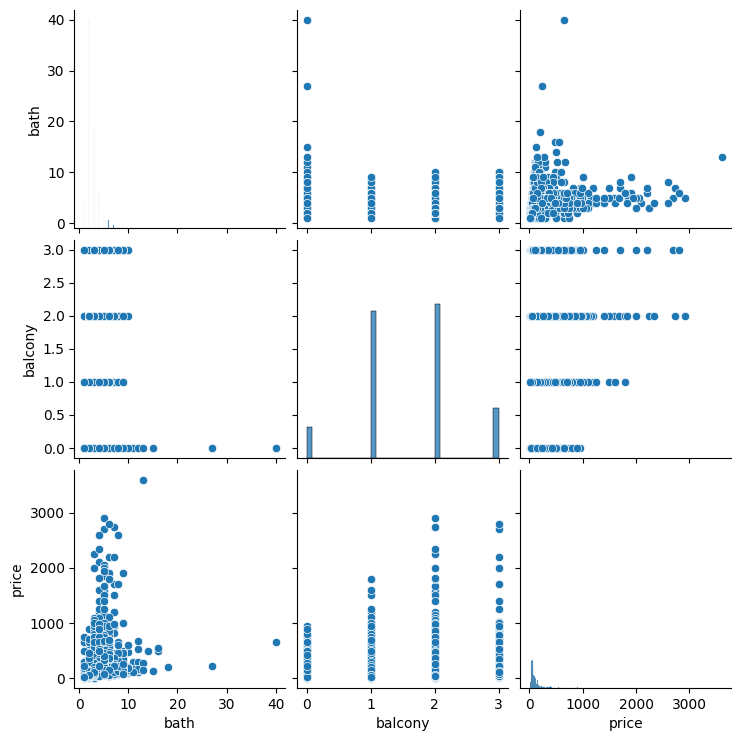

In [6]:
sns.pairplot(df)

# bath and price have slightly linear correlation with some outliers

In [7]:
# value count of each feature
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")

In [8]:
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
--------------------------------
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 B

<Axes: >

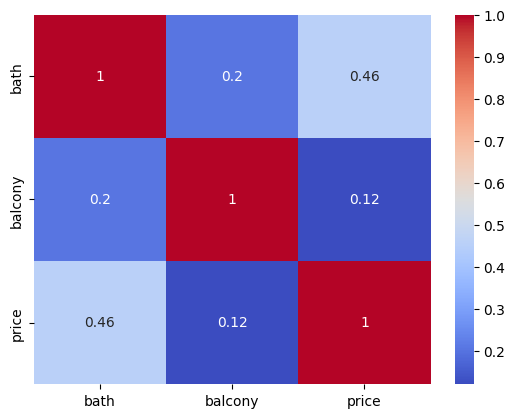

In [9]:
# correlation heatmap
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

# correlation of bath is greater than a balcony with price

## Data cleaning

In [10]:
df.isnull().sum() # find the howmuch missing data available

area_type        0
location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [11]:
df.isnull().mean()*100 # % of measing value

#society has 41.3% missing value (need to drop)

area_type      0.000000
location       0.007508
size           0.120120
society       41.306306
total_sqft     0.000000
bath           0.548048
balcony        4.572072
price          0.000000
dtype: float64

<Axes: >

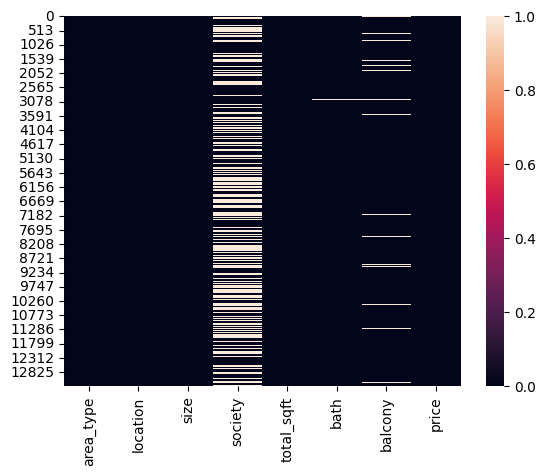

In [12]:
# visualize missing value using heatmap to get idea where is the value missing

# plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [13]:
# Drop ----------> society feature
# because 41.3% missing value
df2 = df.drop('society', axis='columns')
df2.shape

(13320, 7)

In [14]:
df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [15]:
# fill mean value in --------> balcony feature
# because it contain 4.5% missing value
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [16]:
# drop na value rows from df2
# because there is very less % value missing
df3 = df2.dropna()
df3.shape

(13246, 7)

In [17]:
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [18]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   balcony     13246 non-null  float64
 6   price       13246 non-null  float64
dtypes: float64(3), object(4)
memory usage: 827.9+ KB


## Feature Engineering

In [20]:
# to show all th ecolumns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Converting 'total_sqft' cat feature in numeric

In [21]:
df3['total_sqft'].value_counts()

# here we observe that 'total_sqft' contain string value in diff format
#float, int like value 1689.28,817 
# range value: 540 - 740 
# number and string: 142.84Sq. Meter, 117Sq. Yards, 1Grounds

# best strategy is to convert it into number by spliting it

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225                  48


In [22]:
total_sqft_int = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_int.append(float(str_val)) 
                    # if '123.4' like this value in str then conver in float
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+float(temp[-1]))/2)
                    # '123 - 534' this str value split and take mean
    except:
      total_sqft_int.append(np.nan) 
                    # if value not contain in above format then consider as nan

In [23]:
# reset the index of dataframe
df4 = df3.reset_index(drop=True) # drop=True - don't add index column in df

In [24]:
# join df4 and total_srft_int list
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [25]:
df5.isnull().sum()

area_type          0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [26]:
# drop na value
df6 = df5.dropna()
df6.shape

(13200, 8)

In [27]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   location        13200 non-null  object 
 2   size            13200 non-null  object 
 3   total_sqft      13200 non-null  object 
 4   bath            13200 non-null  float64
 5   balcony         13200 non-null  float64
 6   price           13200 non-null  float64
 7   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(4)
memory usage: 928.1+ KB


## Working on <<<< Size >>>> feature

In [28]:
df6['size'].value_counts()

# size feature shows the number of rooms 

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [29]:
"""
in  size feature we assume that 
2 BHK = 2 Bedroom == 2 RK
so takes only number and remove sufix text
"""
size_int = []
for str_val in df6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)

In [30]:
df6 = df6.reset_index(drop=True)

In [31]:
# join df6 and list size_int
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13200, 9)

In [32]:
df7.tail()

,area_type,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
13195,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


In [33]:
# here we consider  1 BHK requierd min 350 sqft are
df7[df7['total_sqft_int']/df7['bhk'] < 350]


,area_type,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.00,1020.000,6
26,Super built-up Area,Electronic City,2 BHK,660,1.0,1.000000,23.10,660.000,2
29,Super built-up Area,Electronic City,3 BHK,1025,2.0,1.000000,47.00,1025.000,3
45,Plot Area,HSR Layout,8 Bedroom,600,9.0,1.584376,200.00,600.000,8
57,Plot Area,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.00,1407.000,6
67,Plot Area,Devarachikkanahalli,8 Bedroom,1350,7.0,0.000000,85.00,1350.000,8
69,Plot Area,Double Road,3 Bedroom,500,3.0,2.000000,100.00,500.000,3
77,Built-up Area,Kaval Byrasandra,2 BHK,460,1.0,0.000000,22.00,460.000,2
87,Plot Area,Rajaji Nagar,6 Bedroom,710,6.0,3.000000,160.00,710.000,6
91,Plot Area,ISRO Layout,4 Bedroom,1200,4.0,2.000000,155.00,1200.000,4


In [34]:
# if 1 BHK total_sqft are < 350 then we ae going to remove them
df8 = df7[~(df7['total_sqft_int']/df7['bhk'] < 350)]
df8.shape

(12106, 9)

In [35]:
# create new feature that is price per squre foot 

#price in lakh so conver into rupee and then / by total_sqft_int
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']  
df8.head()

C:\Users\jenil\AppData\Local\Temp\ipykernel_11072\4237141762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']


,area_type,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [36]:
df8.price_per_sqft.describe()

#here we can see huge difference between min and max price_per_sqft

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

# Working on <<<< Bath >>>> feature

In [37]:
df8.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 14., 12., 16., 10.,
       13.])

In [38]:
df8[df8.bath > df8.bhk+2]

,area_type,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
1063,Plot Area,BTM 1st Stage,9 Bedroom,3300,14.0,1.584376,500.0,3300.0,9,15151.515152
2589,Super built-up Area,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
6766,Super built-up Area,Rajaji Nagar,5 BHK,7500,8.0,3.000000,1700.0,7500.0,5,22666.666667
7626,Built-up Area,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
9873,Plot Area,Sector 1 HSR Layout,3 Bedroom,2400,6.0,2.000000,775.0,2400.0,3,32291.666667
11256,Built-up Area,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
11990,Super built-up Area,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330
12328,Plot Area,Dollars Colony,4 Bedroom,4350,8.0,1.584376,2600.0,4350.0,4,59770.114943
12948,Plot Area,Defence Colony,10 Bedroom,7150,13.0,1.584376,3600.0,7150.0,10,50349.650350


In [39]:
# here we are considering data only total no. bathroom =  bhk + 1
df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(11959, 10)

In [40]:
df9.head()

,area_type,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


# Categorical Variable Encoding

In [41]:
df10 = df9.drop(["size","total_sqft"], axis =1)
df10.head()

,area_type,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Kothanur,2.0,1.0,51.00,1200.0,2,4250.000000


In [42]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11959 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       11959 non-null  object 
 1   location        11959 non-null  object 
 2   bath            11959 non-null  float64
 3   balcony         11959 non-null  float64
 4   price           11959 non-null  float64
 5   total_sqft_int  11959 non-null  float64
 6   bhk             11959 non-null  int64  
 7   price_per_sqft  11959 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 840.9+ KB


## Working on <<<<<< area_type >>>>> feature

In [43]:
df10['area_type'].value_counts()

Super built-up  Area    8518
Built-up  Area          2248
Plot  Area              1115
Carpet  Area              78
Name: area_type, dtype: int64

In [44]:
df11 = df10.copy()
# appy Ohe-Hot  encoding on 'area_type' feature
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df11["area_type"+cat_var] = np.where(df11['area_type']==cat_var, 1,0)
df11.shape      # this was only name areatype + car_var

(11959, 11)

In [45]:
df11.head(2)

,area_type,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,1056.0,2,3699.810606,1,0,0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4,4615.384615,0,0,1


In [46]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11959 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   area_type                      11959 non-null  object 
 1   location                       11959 non-null  object 
 2   bath                           11959 non-null  float64
 3   balcony                        11959 non-null  float64
 4   price                          11959 non-null  float64
 5   total_sqft_int                 11959 non-null  float64
 6   bhk                            11959 non-null  int64  
 7   price_per_sqft                 11959 non-null  float64
 8   area_typeSuper built-up  Area  11959 non-null  int32  
 9   area_typeBuilt-up  Area        11959 non-null  int32  
 10  area_typePlot  Area            11959 non-null  int32  
dtypes: float64(5), int32(3), int64(1), object(2)
memory usage: 981.0+ KB


# Working on <<<< Location >>>> feature

In [47]:
location_value_count = df11['location'].value_counts()
location_value_count

Whitefield                                         521
Sarjapur  Road                                     377
Electronic City                                    282
Kanakpura Road                                     259
Thanisandra                                        230
Yelahanka                                          201
Uttarahalli                                        178
Marathahalli                                       170
Raja Rajeshwari Nagar                              165
Hebbal                                             161
Hennur Road                                        148
Bannerghatta Road                                  147
7th Phase JP Nagar                                 145
Haralur Road                                       139
Electronic City Phase II                           123
Bellandur                                           94
Rajaji Nagar                                        93
Chandapura                                          89
Electronic

In [48]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Marathahalli',
       'Raja Rajeshwari Nagar', 'Hebbal',
       ...
       'Margondanahalli', 'Banashankari Stage III', 'Battarahalli',
       'Magadi Road', 'Abbigere', 'Kaval Byrasandra', 'Kogilu',
       '1st Phase JP Nagar', '6th Phase JP Nagar', 'Rayasandra'],
      dtype='object', length=137)

In [49]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
df12 = df11.copy()
for cat_var in location_gert_20:
  df12['location_'+cat_var]=np.where(df12['location']==cat_var, 1,0)
df12.shape

C:\Users\jenil\AppData\Local\Temp\ipykernel_11072\3256877540.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df12['location_'+cat_var]=np.where(df12['location']==cat_var, 1,0)
C:\Users\jenil\AppData\Local\Temp\ipykernel_11072\3256877540.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df12['location_'+cat_var]=np.where(df12['location']==cat_var, 1,0)
C:\Users\jenil\AppData\Local\Temp\ipykernel_11072\3256877540.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

(11959, 148)

In [50]:
df12.head()

,area_type,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Kanakpura Road,location_Thanisandra,location_Yelahanka,location_Uttarahalli,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Hebbal,location_Hennur Road,location_Bannerghatta Road,location_7th Phase JP Nagar,location_Haralur Road,location_Electronic City Phase II,location_Bellandur,location_Rajaji Nagar,location_Chandapura,location_Electronics City Phase 1,location_Hoodi,location_Begur Road,location_Yeshwanthpur,location_Kasavanhalli,location_KR Puram,location_Harlur,location_Sarjapur,location_Hormavu,location_Koramangala,location_Banashankari,location_Varthur,location_Hosa Road,location_Kengeri,location_Jakkur,location_Kothanur,location_JP Nagar,location_Kaggadasapura,location_Akshaya Nagar,location_Ramamurthy Nagar,location_Rachenahalli,location_Old Madras Road,location_Thigalarapalya,location_TC Palaya,location_Budigere,location_Panathur,location_Hennur,location_HSR Layout,location_Bisuvanahalli,location_Ramagondanahalli,location_Malleshwaram,location_Bhoganhalli,location_Jigani,location_Kundalahalli,location_8th Phase JP Nagar,location_Jalahalli,location_Hegde Nagar,location_Gottigere,location_Brookefield,location_Hosur Road,location_Hulimavu,location_Balagere,location_Mysore Road,location_Nagarbhavi,location_Indira Nagar,location_Kanakapura,location_Vittasandra,location_CV Raman Nagar,location_Subramanyapura,location_Devanahalli,location_Talaghattapura,location_Kadugodi,location_Green Glen Layout,location_Horamavu Agara,location_Channasandra,location_Attibele,location_Lakshminarayana Pura,location_Kudlu Gate,location_Bommasandra,location_Sahakara Nagar,location_Yelahanka New Town,location_Vijayanagar,location_5th Phase JP Nagar,location_Frazer Town,location_Old Airport Road,location_9th Phase JP Nagar,location_Kalena Agrahara,location_Hosakerehalli,location_Bommanahalli,location_Tumkur Road,location_Kengeri Satellite Town,location_R.T. Nagar,location_Ambedkar Nagar,location_Mahadevpura,location_Hebbal Kempapura,location_Doddathoguru,location_Kudlu,location_Dodda Nekkundi,location_Somasundara Palya,location_Ananth Nagar,location_Chikkalasandra,location_Basavangudi,location_Vidyaranyapura,location_BTM 2nd Stage,location_Ambalipura,location_Anekal,location_Padmanabhanagar,location_Bommasandra Industrial Area,location_Kammasandra,location_Gubbalala,location_Choodasandra,location_Iblur Village,location_Horamavu Banaswadi,location_Ardendale,location_Babusapalaya,location_Kodichikkanahalli,location_Kambipura,location_Singasandra,location_Seegehalli,location_Lingadheeranahalli,location_Anandapura,location_Sonnenahalli,location_Kothannur,location_Kathriguppe,location_Amruthahalli,location_EPIP Zone,location_Domlur,location_Thubarahalli,location_Gunjur,location_Margondanahalli,location_Banashankari Stage III,location_Battarahalli,location_Magadi Road,location_Abbigere,location_Kaval Byrasandra,location_Kogilu,location_1st Phase JP Nagar,location_6th Phase JP Nagar,location_Rayasandra
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,1056.0,2,3699.810606,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,2600.0,4,4615.384615,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,1440.0,3,4305.555556,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Drop categorical variable

In [51]:
df13 = df12.drop(["area_type",'location'], axis =1)
df13.shape

(11959, 146)

In [52]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11959 entries, 0 to 13199
Columns: 146 entries, bath to location_Rayasandra
dtypes: float64(5), int32(140), int64(1)
memory usage: 7.0 MB


In [53]:
df13.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Kanakpura Road,location_Thanisandra,location_Yelahanka,location_Uttarahalli,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Hebbal,location_Hennur Road,location_Bannerghatta Road,location_7th Phase JP Nagar,location_Haralur Road,location_Electronic City Phase II,location_Bellandur,location_Rajaji Nagar,location_Chandapura,location_Electronics City Phase 1,location_Hoodi,location_Begur Road,location_Yeshwanthpur,location_Kasavanhalli,location_KR Puram,location_Harlur,location_Sarjapur,location_Hormavu,location_Koramangala,location_Banashankari,location_Varthur,location_Hosa Road,location_Kengeri,location_Jakkur,location_Kothanur,location_JP Nagar,location_Kaggadasapura,location_Akshaya Nagar,location_Ramamurthy Nagar,location_Rachenahalli,location_Old Madras Road,location_Thigalarapalya,location_TC Palaya,location_Budigere,location_Panathur,location_Hennur,location_HSR Layout,location_Bisuvanahalli,location_Ramagondanahalli,location_Malleshwaram,location_Bhoganhalli,location_Jigani,location_Kundalahalli,location_8th Phase JP Nagar,location_Jalahalli,location_Hegde Nagar,location_Gottigere,location_Brookefield,location_Hosur Road,location_Hulimavu,location_Balagere,location_Mysore Road,location_Nagarbhavi,location_Indira Nagar,location_Kanakapura,location_Vittasandra,location_CV Raman Nagar,location_Subramanyapura,location_Devanahalli,location_Talaghattapura,location_Kadugodi,location_Green Glen Layout,location_Horamavu Agara,location_Channasandra,location_Attibele,location_Lakshminarayana Pura,location_Kudlu Gate,location_Bommasandra,location_Sahakara Nagar,location_Yelahanka New Town,location_Vijayanagar,location_5th Phase JP Nagar,location_Frazer Town,location_Old Airport Road,location_9th Phase JP Nagar,location_Kalena Agrahara,location_Hosakerehalli,location_Bommanahalli,location_Tumkur Road,location_Kengeri Satellite Town,location_R.T. Nagar,location_Ambedkar Nagar,location_Mahadevpura,location_Hebbal Kempapura,location_Doddathoguru,location_Kudlu,location_Dodda Nekkundi,location_Somasundara Palya,location_Ananth Nagar,location_Chikkalasandra,location_Basavangudi,location_Vidyaranyapura,location_BTM 2nd Stage,location_Ambalipura,location_Anekal,location_Padmanabhanagar,location_Bommasandra Industrial Area,location_Kammasandra,location_Gubbalala,location_Choodasandra,location_Iblur Village,location_Horamavu Banaswadi,location_Ardendale,location_Babusapalaya,location_Kodichikkanahalli,location_Kambipura,location_Singasandra,location_Seegehalli,location_Lingadheeranahalli,location_Anandapura,location_Sonnenahalli,location_Kothannur,location_Kathriguppe,location_Amruthahalli,location_EPIP Zone,location_Domlur,location_Thubarahalli,location_Gunjur,location_Margondanahalli,location_Banashankari Stage III,location_Battarahalli,location_Magadi Road,location_Abbigere,location_Kaval Byrasandra,location_Kogilu,location_1st Phase JP Nagar,location_6th Phase JP Nagar,location_Rayasandra
0,2.0,1.0,39.07,1056.0,2,3699.810606,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,2600.0,4,4615.384615,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,62.00,1440.0,3,4305.555556,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [54]:
df13.to_csv('data.csv', index=False) 